![MLU Logo](../data/MLU_Logo.png)

# <a name="0">Machine Learning Accelerator - Tabular Data - Lecture 1</a>


## Final Project 

In this notebook, we build a ML model to predict the __Time at Center__ field of our final project dataset.

1. <a href="#1">Read the dataset</a> (Given) 
2. <a href="#2">Train a model</a> (Implement)
    * <a href="#21">Exploratory Data Analysis</a>
    * <a href="#22">Select features to build the model</a>
    * <a href="#23">Data processing</a>
    * <a href="#24">Model training</a>
3. <a href="#3">Make predictions on the test dataset</a> (Implement)
4. <a href="#4">Write the test predictions to a CSV file</a> (Given)

__Austin Animal Center Dataset__:

In this exercise, we are working with pet adoption data from __Austin Animal Center__. We have two datasets that cover intake and outcome of animals. Intake data is available from [here](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) and outcome is from [here](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238). 

In order to work with a single table, we joined the intake and outcome tables using the "Animal ID" column and created a training.csv, test_features.csv and y_test.csv files. Similar to our review dataset, we didn't consider animals with multiple entries to the facility to keep it simple. If you want to see the original datasets, they are available under data/review folder: Austin_Animal_Center_Intakes.csv, Austin_Animal_Center_Outcomes.csv.

__Dataset schema:__ 
- __Pet ID__ - Unique ID of pet
- __Outcome Type__ - State of pet at the time of recording the outcome
- __Sex upon Outcome__ - Sex of pet at outcome
- __Name__ - Name of pet 
- __Found Location__ - Found location of pet before entered the center
- __Intake Type__ - Circumstances bringing the pet to the center
- __Intake Condition__ - Health condition of pet when entered the center
- __Pet Type__ - Type of pet
- __Sex upon Intake__ - Sex of pet when entered the center
- __Breed__ - Breed of pet 
- __Color__ - Color of pet 
- __Age upon Intake Days__ - Age of pet when entered the center (days)
- __Time at Center__ - Time at center (0 = less than 30 days; 1 = more than 30 days). This is the value to predict. 


In [20]:
%pip install -q -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Cannot install -r ../requirements.txt (line 10), -r ../requirements.txt (line 4), -r ../requirements.txt (line 5), -r ../requirements.txt (line 7) and numpy==1.19.5 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


## 1. <a name="1">Read the datasets</a> (Given)
(<a href="#0">Go to top</a>)

Let's read the datasets into dataframes, using Pandas.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")
  
training_data = pd.read_csv('../data/final_project/training.csv')
test_data = pd.read_csv('../data/final_project/test_features.csv')

print('The shape of the training dataset is:', training_data.shape)
print('The shape of the test dataset is:', test_data.shape)


The shape of the training dataset is: (71538, 13)
The shape of the test dataset is: (23846, 12)


## 2. <a name="2">Train a model</a> (Implement)
(<a href="#0">Go to top</a>)

 * <a href="#21">Exploratory Data Analysis</a>
 * <a href="#22">Select features to build the model</a>
 * <a href="#23">Data processing</a>
 * <a href="#24">Model training</a>

### 2.1 <a name="21">Exploratory Data Analysis</a> 
(<a href="#2">Go to Train a model</a>)

We look at number of rows, columns and some simple statistics of the dataset.

In [22]:
# Implement here

training_data.head()

,Pet ID,Outcome Type,Sex upon Outcome,Name,Found Location,Intake Type,Intake Condition,Pet Type,Sex upon Intake,Breed,Color,Age upon Intake Days,Time at Center
0,A745079,Transfer,Unknown,NaN,7920 Old Lockhart in Travis (TX),Stray,Normal,Cat,Unknown,Domestic Shorthair Mix,Blue,3,0
1,A801765,Transfer,Intact Female,NaN,5006 Table Top in Austin (TX),Stray,Normal,Cat,Intact Female,Domestic Shorthair,Brown Tabby/White,28,0
2,A667965,Transfer,Neutered Male,NaN,14100 Thermal Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,Chihuahua Shorthair Mix,Brown/Tan,1825,0
3,A687551,Transfer,Intact Male,NaN,5811 Cedardale Dr in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Brown Tabby,28,0
4,A773004,Adoption,Neutered Male,*Boris,Highway 290 And Arterial A in Austin (TX),Stray,Normal,Dog,Intact Male,Chihuahua Shorthair Mix,Tricolor/Cream,365,0


In [23]:
# Implement here

test_data.head()

,Pet ID,Outcome Type,Sex upon Outcome,Name,Found Location,Intake Type,Intake Condition,Pet Type,Sex upon Intake,Breed,Color,Age upon Intake Days
0,A782657,Adoption,Spayed Female,NaN,1911 Dear Run Drive in Austin (TX),Stray,Normal,Dog,Intact Female,Labrador Retriever Mix,Black,60
1,A804622,Adoption,Neutered Male,NaN,702 Grand Canyon in Austin (TX),Stray,Normal,Dog,Intact Male,Boxer/Anatol Shepherd,Brown/Tricolor,60
2,A786693,Return to Owner,Neutered Male,Zeus,Austin (TX),Public Assist,Normal,Dog,Neutered Male,Australian Cattle Dog/Pit Bull,Black/White,3285
3,A693330,Adoption,Spayed Female,Hope,Levander Loop & Airport Blvd in Austin (TX),Stray,Normal,Dog,Intact Female,Miniature Poodle,Gray,1825
4,A812431,Adoption,Neutered Male,NaN,Austin (TX),Owner Surrender,Injured,Cat,Intact Male,Domestic Shorthair,Blue/White,210


### 2.2 <a name="22">Select features to build the model</a> 
(<a href="#2">Go to Train a model</a>)


In [30]:
model_features = training_data.columns.drop(['Time at Center', 'Name'])
model_target = 'Time at Center'

numerical_features = training_data[model_features].select_dtypes(include=np.number).columns
print('Numerical columns:',numerical_features)

print('')

categorical_features = training_data[model_features].select_dtypes(include='object').columns
print('Categorical columns:',categorical_features)

Numerical columns: Index(['Age upon Intake Days'], dtype='object')

Categorical columns: Index(['Pet ID', 'Outcome Type', 'Sex upon Outcome', 'Found Location',
       'Intake Type', 'Intake Condition', 'Pet Type', 'Sex upon Intake',
       'Breed', 'Color'],
      dtype='object')


### 2.3 <a name="23">Data Processing</a> 
(<a href="#2">Go to Train a model</a>)


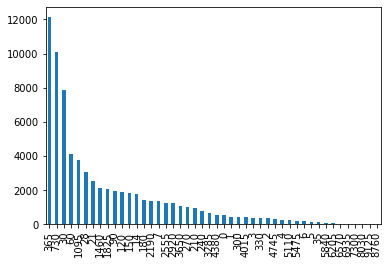

Age upon Intake Days    0
dtype: int64
Pet ID              0
Outcome Type        5
Sex upon Outcome    1
Found Location      0
Intake Type         0
Intake Condition    0
Pet Type            0
Sex upon Intake     1
Breed               0
Color               0
dtype: int64
Pet ID              0
Outcome Type        0
Sex upon Outcome    0
Found Location      0
Intake Type         0
Intake Condition    0
Pet Type            0
Sex upon Intake     0
Breed               0
Color               0
dtype: int64


In [31]:
# Implement here

training_data['Age upon Intake Days'].value_counts().plot.bar()
plt.show()

print(training_data[numerical_features].isna().sum())

td_imputed = training_data.copy()
print(td_imputed[categorical_features].isna().sum())

for c in categorical_features:
    mode_impute = td_imputed[c].mode()

    # Impute our categorical features with the mode
    # "inplace=True" parameter replaces missing values in place (no need for left handside assignment)
    td_imputed[c].fillna(False, inplace=True)

print(td_imputed[categorical_features].isna().sum())

# Balancing makes the accuracy worse.
# from sklearn.utils import shuffle

# class_0_no = td_imputed[td_imputed[model_target] == 0]
# class_1_no = td_imputed[td_imputed[model_target] == 1]

# upsampled_class_0_no = class_0_no.sample(n=len(class_1_no), replace=True, random_state=42)

# td_imputed = pd.concat([class_1_no, upsampled_class_0_no])
# td_imputed = shuffle(td_imputed)


### 2.4 <a name="24">Model training</a> 
(<a href="#2">Go to Train a model</a>)


In [32]:
classifier = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
    ('estimator', KNeighborsClassifier(n_neighbors = 3))
])

from sklearn import set_config
set_config(display='diagram')
classifier

x_train = td_imputed[numerical_features]
y_train = td_imputed[model_target]

classifier.fit(x_train, y_train)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

# Use the fitted model to make predictions on the train dataset
# Train data going through the Pipeline it's first imputed (with means from the train), scaled (with the min/max from the train data), and finally used to make predictions
train_predictions = classifier.predict(x_train)

print('Model performance on the train set:')
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Train accuracy:", accuracy_score(y_train, train_predictions))

Model performance on the train set:
[[65171   143]
 [ 6007   217]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.95     65314
           1       0.60      0.03      0.07      6224

    accuracy                           0.91     71538
   macro avg       0.76      0.52      0.51     71538
weighted avg       0.89      0.91      0.88     71538

Train accuracy: 0.9140317034303447


## 3. <a name="3">Make predictions on the test dataset</a> (Implement)
(<a href="#0">Go to top</a>)

Use the test set to make predictions with the trained model.

In [27]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

# Get test data to test the classifier
X_test = test_data[numerical_features]
y_test = test_data[model_target]

test_predictions = classifier.predict(X_test)

print('Model performance on the test set:')
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print("Test accuracy:", accuracy_score(y_test, test_predictions))

KeyError: 'Time at Center'